#### Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

##### Data Description:
##### Murder -- Muder rates in different places of United States
##### Assualt- Assualt rate in different places of United States
##### UrbanPop - urban population in different places of United States
##### Rape - Rape rate in different places of United States

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\07_clustering\crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df=df.rename(columns={"Unnamed: 0":"States"})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


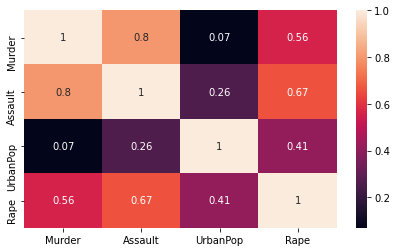

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True)

In [8]:
from sklearn.cluster import KMeans

In [11]:
#normalization funciotn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

In [12]:
#finding optimum number of cluster
#within cluster sum of square

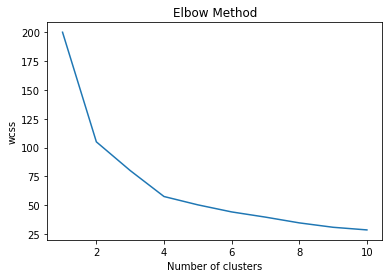

In [15]:
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [16]:
#from above chart we can choose no. of cluster to 4

In [17]:
#Building Kmeans clustering algorithm
clusters_new = KMeans(4, random_state=52)#random state can be any no. to get same result every time
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=52)

In [18]:
#assigning cluster to dataset
df['kmean_cluster']= clusters_new.labels_

In [20]:
df.groupby('kmean_cluster').agg(['mean']).reset_index()

,kmean_cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.815385,257.384615,76.000000,33.192308
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.656250,138.875000,73.875000,18.781250


In [22]:
df.head()

,States,Murder,Assault,UrbanPop,Rape,kmean_cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [24]:
#hierachical clustering 

#importing Hierachical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

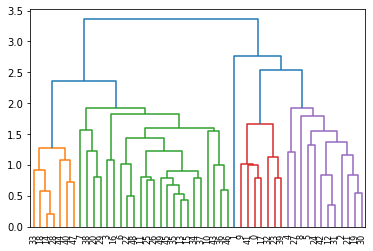

In [27]:
#creating dandrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method="average"))

In [28]:
#creating clusters
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage='single')

y_hc = hc.fit_predict(scaled_df)
clusters=pd.DataFrame(y_hc,columns=['H_clusters'])

In [29]:
df['H_clusters']=hc.labels_
df.head()

,States,Murder,Assault,UrbanPop,Rape,kmean_cluster,H_clusters
0,Alabama,13.2,236,58,21.2,2,0
1,Alaska,10.0,263,48,44.5,1,3
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,1


In [30]:
df.groupby('H_clusters').agg(['mean']).reset_index()

,H_clusters,Murder,Assault,UrbanPop,Rape,kmean_cluster
,,mean,mean,mean,mean,mean
0,0,7.452174,161.130435,64.717391,19.534783,1.586957
1,1,10.600000,264.000000,86.000000,43.300000,1.000000
2,2,15.400000,335.000000,80.000000,31.900000,1.000000
3,3,10.000000,263.000000,48.000000,44.500000,1.000000


#####  No. of clusters form are 4

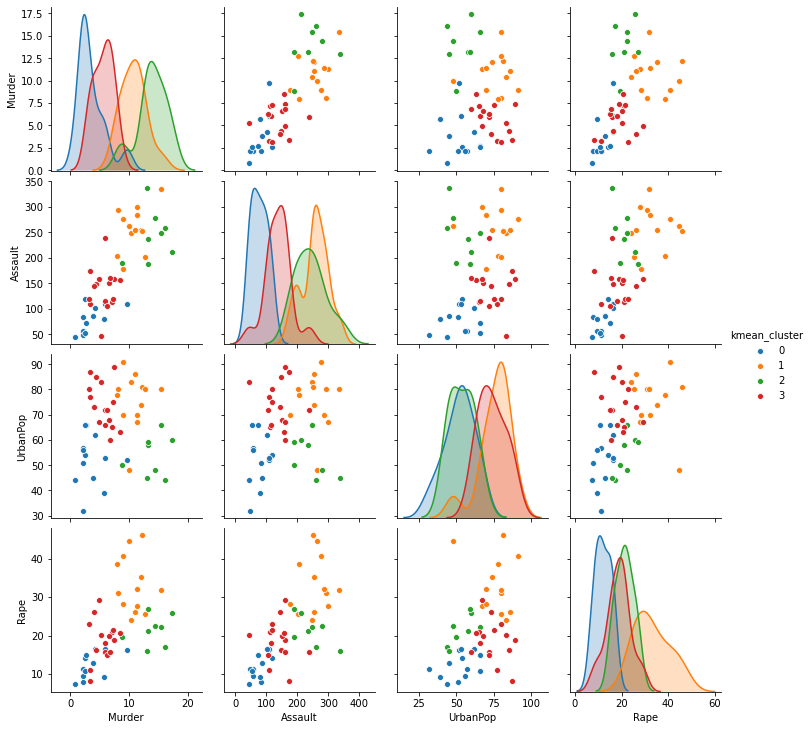

In [35]:
sns.pairplot(df.iloc[:,1:-1], hue='kmean_cluster')
plt.show()